## Regresión lineal simple

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [13]:
!pip install openpyxl
!pip install -U scikit-learn

In [14]:
df = pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [15]:
# Exploracion de datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,945.0,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2022.0,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582
std,0.0,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000


In [16]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
5,2.0,4,9.8,231
6,3.0,6,11.0,256
7,3.0,6,11.2,261
8,2.0,4,8.7,205


array([[<Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'ENGINESIZE'}>],
       [<Axes: title={'center': 'CO2EMISSIONS'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB'}>]], dtype=object)

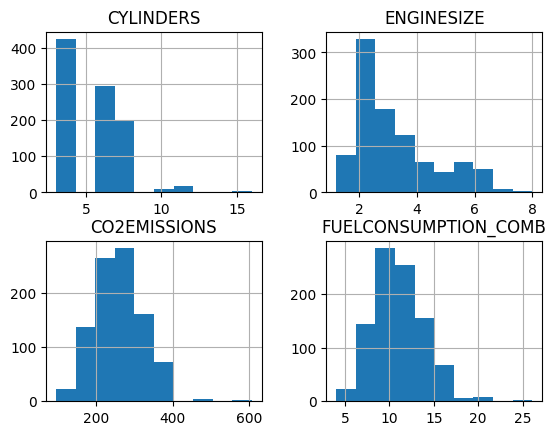

In [17]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()

Text(0, 0.5, 'Emission')

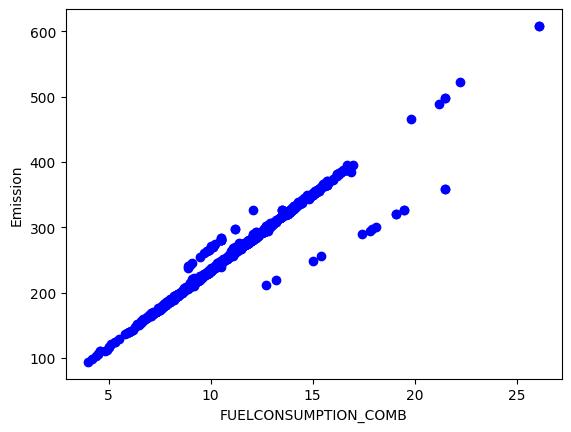

In [18]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

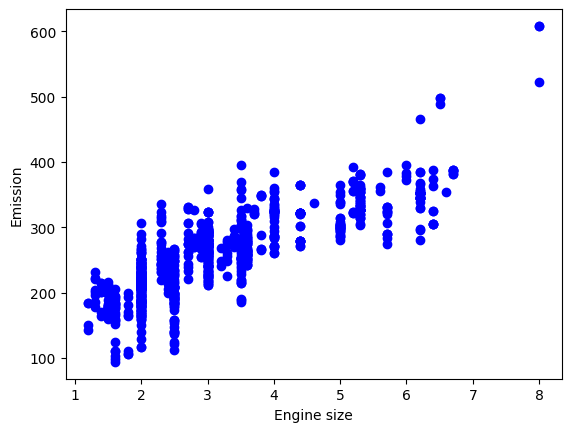

In [19]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")


Text(0, 0.5, 'Emission')

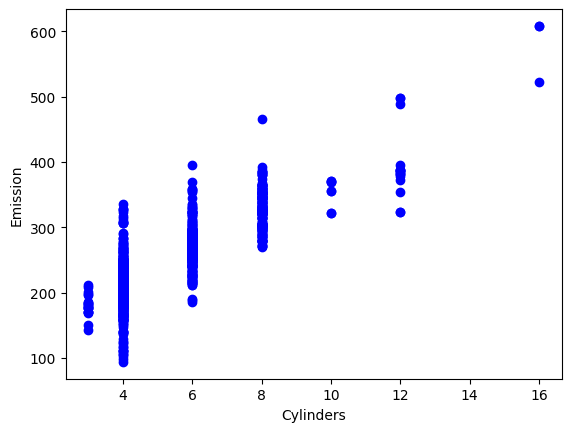

In [20]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")

In [21]:
msk = np.random.rand(len(df)) <= 0.80
msk

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,

In [22]:
train = cdf[msk]
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
6,3.0,6,11.0,256
...,...,...,...,...
938,2.0,4,9.5,222
940,2.0,4,9.4,219
941,2.0,4,9.4,219
942,2.0,4,9.9,232


In [23]:
test = cdf[~msk]
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,3.5,6,11.2,263
5,2.0,4,9.8,231
15,5.2,12,13.8,324
16,5.2,12,13.8,324
21,2.0,4,8.8,205
...,...,...,...,...
920,2.0,4,8.3,194
927,2.0,4,7.9,186
929,1.5,4,7.6,178
939,2.0,4,9.3,217


Text(0, 0.5, 'Emission')

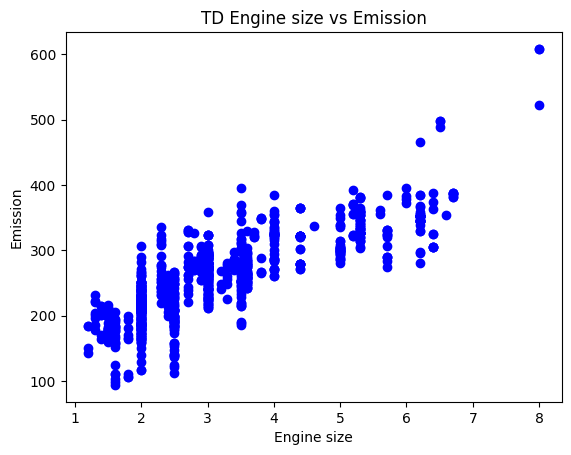

In [24]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.title("TD Engine size vs Emission")
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)


LinearRegression()

In [26]:
print ('Coeficiente de pendiente ', regr.coef_)
print ('Coeficiente de Intercepto ', regr.intercept_)

Coeficiente de pendiente  [[38.26507483]]
Coeficiente de Intercepto  [136.48813283]


CO2 EMISIONES = 136.48 + 38.26 (ENGINESIZE)

Text(0, 0.5, 'Emission')

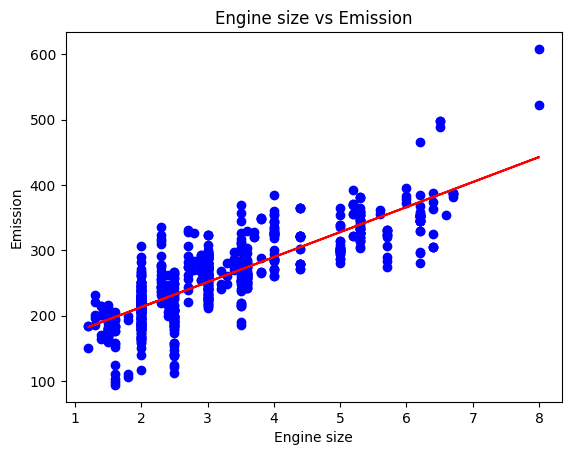

In [28]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.title("Engine size vs Emission")
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [29]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

In [30]:
test_y_hat

array([[270.41589473],
       [213.01828249],
       [335.46652194],
       [335.46652194],
       [213.01828249],
       [213.01828249],
       [251.28335732],
       [289.54843214],
       [289.54843214],
       [289.54843214],
       [213.01828249],
       [289.54843214],
       [289.54843214],
       [213.01828249],
       [304.85446207],
       [251.28335732],
       [251.28335732],
       [304.85446207],
       [304.85446207],
       [304.85446207],
       [251.28335732],
       [251.28335732],
       [251.28335732],
       [442.60873145],
       [239.80383487],
       [274.24240221],
       [213.01828249],
       [213.01828249],
       [274.24240221],
       [193.88574507],
       [239.80383487],
       [239.80383487],
       [339.29302942],
       [373.73159676],
       [373.73159676],
       [251.28335732],
       [251.28335732],
       [339.29302942],
       [373.73159676],
       [186.23273011],
       [354.59905935],
       [381.38461173],
       [373.73159676],
       [373

In [31]:
test_y 

array([[263],
       [231],
       [324],
       [324],
       [205],
       [233],
       [273],
       [315],
       [323],
       [325],
       [209],
       [309],
       [323],
       [202],
       [279],
       [296],
       [211],
       [322],
       [322],
       [322],
       [323],
       [241],
       [256],
       [608],
       [233],
       [297],
       [222],
       [239],
       [283],
       [198],
       [306],
       [328],
       [361],
       [385],
       [366],
       [281],
       [281],
       [327],
       [345],
       [178],
       [289],
       [325],
       [339],
       [352],
       [289],
       [305],
       [331],
       [308],
       [358],
       [262],
       [136],
       [317],
       [252],
       [225],
       [281],
       [289],
       [277],
       [256],
       [359],
       [228],
       [395],
       [226],
       [231],
       [242],
       [221],
       [221],
       [219],
       [249],
       [273],
       [229],
       [270],
      

In [34]:
print ("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print ("Suma de los cuadrados de los errores (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print ("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Error medio absoluto: 31.06
Suma de los cuadrados de los errores (MSE): 1601.54
R2-score: 0.41


In [36]:
# probar con mas variables

cdf2= df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY' ,'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf2.head(9)

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,9.9,7.0,4,8.6,200
1,3.5,12.6,9.4,6,11.2,263
2,2.0,11.0,8.6,4,9.9,232
3,2.0,11.3,9.1,4,10.3,242
4,2.0,11.2,8.0,4,9.8,230
5,2.0,11.3,8.1,4,9.8,231
6,3.0,12.3,9.4,6,11.0,256
7,3.0,12.3,9.8,6,11.2,261
8,2.0,10.0,7.2,4,8.7,205


In [37]:
x = np.asanyarray(cdf2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(cdf2[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coeficientes de variables independientes: ', regr.coef_)
print ('Coeficiente de Intercepto: ',regr.intercept_)

Coeficientes de variables independientes:  [[ 0.64718058  3.19806803 19.75582963]]
Coeficiente de Intercepto:  [19.8693863]


CO2EMISSIONS = 19.86 + 0.64 (ENGINESIZE) + 3.19 (CYLINDRES) + 19.75 (FUELCONSUMPTION_COMB)

In [39]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Error medio absoluto: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Suma de los cuadrados de los errores (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )


Error medio absoluto: 7.58
Suma de los cuadrados de los errores (MSE): 219.69
R2-score: 0.95


c:\Users\benma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
